In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

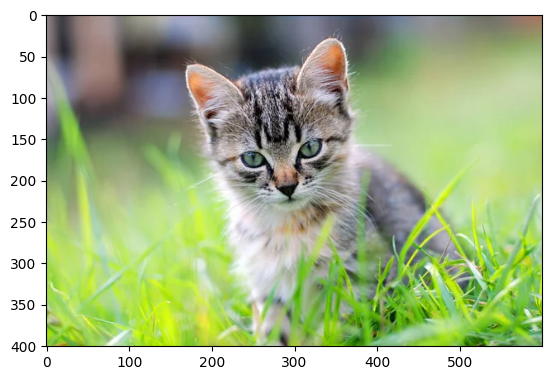

In [2]:
img = cv2.imread('image.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# **------------------------------- ASSIGNMENT 1 -------------------------------**

# **1. Understanding Convolution Basics**

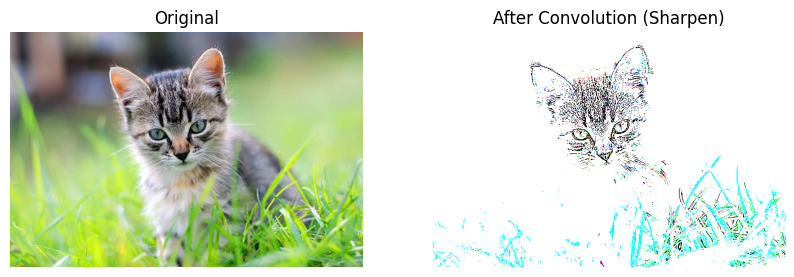

In [3]:
def conv2d(img, ker):
    h, w, c = img.shape
    k_h, k_w = ker.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w), (0,0)), 'constant')
    output = np.zeros((h, w, c))

    for ch in range(c):
        for i in range(h):
            for j in range(w):
                output[i, j, ch] = np.sum(img[i:i+k_h, j:j+k_w, ch] * ker)
    return output

# Display :
kernel = np.ones((3,3)) / 9
kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])


out_img = conv2d(img, kernel)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(out_img)
plt.title("After Convolution (Sharpen)")
plt.axis('off')

plt.show()

# **2. Image Smoothing Using Linear Filters**

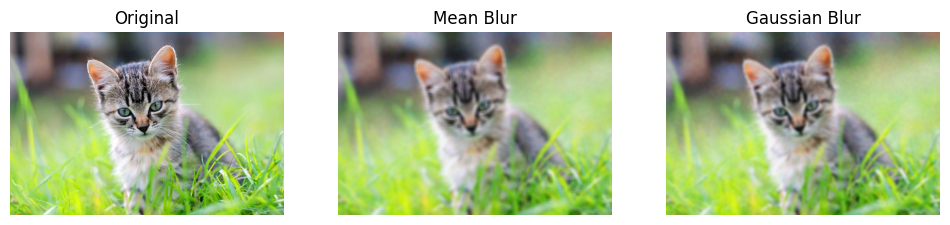

(np.float64(-0.5), np.float64(599.5), np.float64(400.5), np.float64(-0.5))

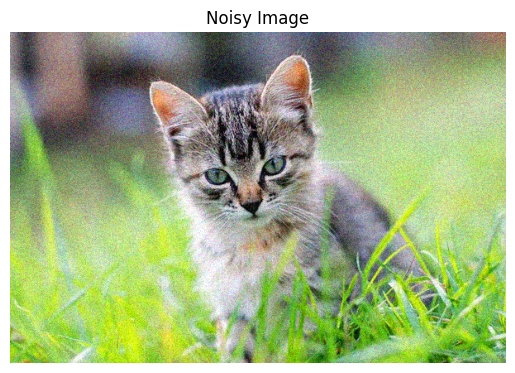

In [4]:
noise = np.random.normal(0, 20, img.shape)
noisy = np.clip(img + noise, 0, 255).astype(np.uint8)

mean = cv2.blur(noisy, (9,9))
gaussian = cv2.GaussianBlur(noisy, (9,9), 3.0)

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(mean, cv2.COLOR_BGR2RGB))
plt.title("Mean Blur")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.show()

plt.imshow(cv2.cvtColor(noisy, cv2.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.axis('off')


# **3. Sharpening Images Using Spatial Filters**

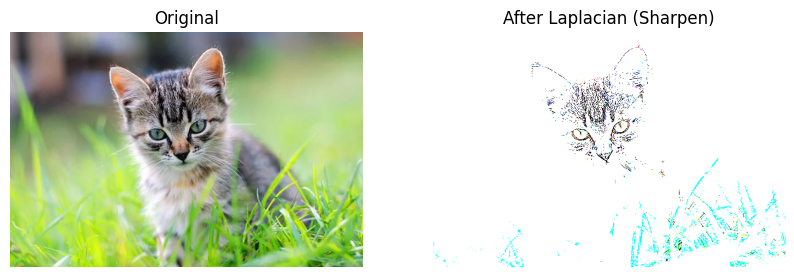

In [5]:
laplacian = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
edges = conv2d(img, laplacian)

sharpened = img + edges
sharpened = np.clip(sharpened, 0, 255)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharpened)
plt.title("After Laplacian (Sharpen)")
plt.axis('off')

plt.show()

# **4. Separable Filters and Computational Efficiency**

PSNR between Gaussian and Sharpened: 29.41497381221017


(np.float64(-0.5), np.float64(599.5), np.float64(400.5), np.float64(-0.5))

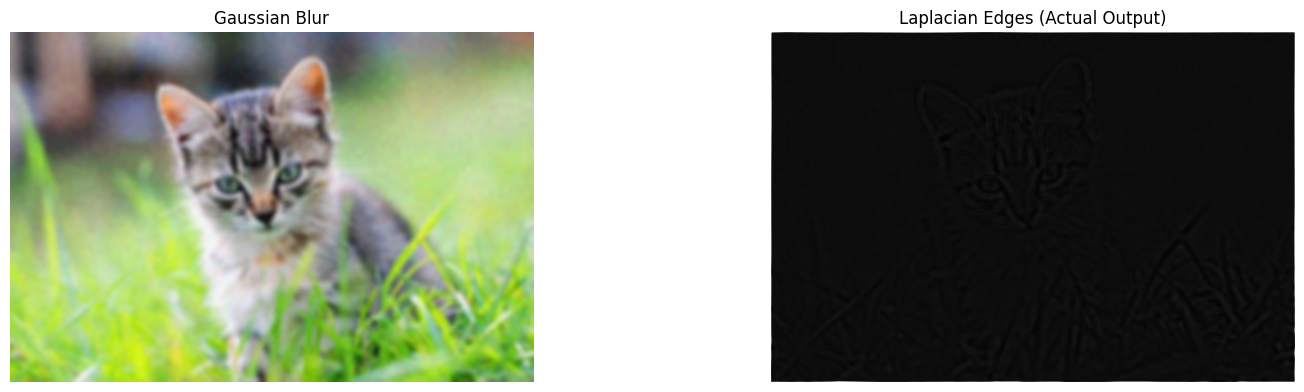

In [6]:
edges = conv2d(gaussian, laplacian)

sharpened = gaussian + edges
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

diff = np.abs(sharpened.astype(float) - gaussian.astype(float))

def psnr(a,b):
    mse = np.mean((a.astype(float)-b.astype(float))**2)
    return 10*np.log10(255*255/mse)

print("PSNR between Gaussian and Sharpened:",
      psnr(gaussian, sharpened))


plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(edges[:,:,0], cmap='gray')
plt.title("Laplacian Edges (Actual Output)")
plt.axis('off')


# **5. Non-Linear vs Linear Filtering**

PSNR between SaltPepper and Sharpened: 15.887764322048337


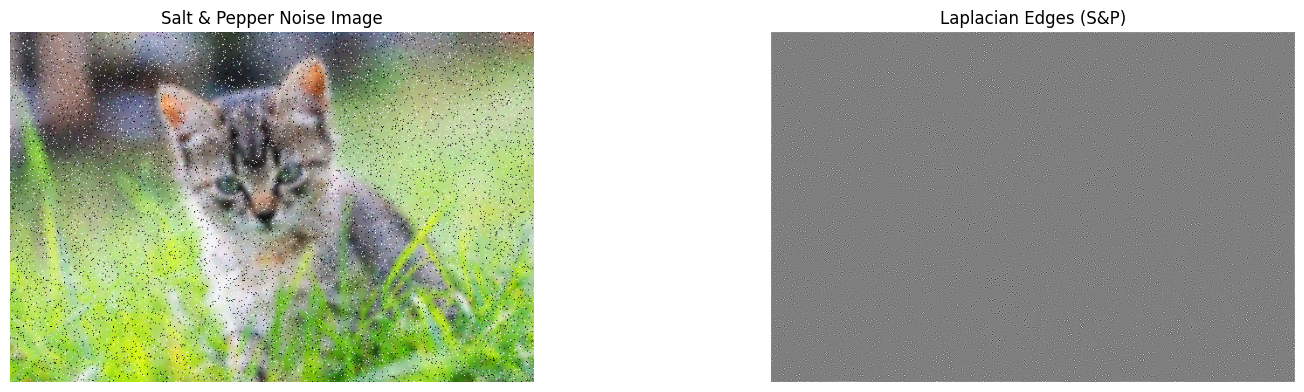

In [7]:
def add_salt_pepper(img, prob=0.02):
    noisy = img.copy()
    rnd = np.random.rand(img.shape[0], img.shape[1])

    mask_salt = rnd > 1 - prob
    mask_pepper = rnd < prob

    noisy[mask_salt] = [255,255,255]
    noisy[mask_pepper] = [0,0,0]
    return noisy

sp = add_salt_pepper(gaussian, prob=0.03)

edges_sp = conv2d(sp, laplacian)

sharpened_sp = sp.astype(float) + edges_sp.astype(float)
sharpened_sp = np.clip(sharpened_sp, 0, 255).astype(np.uint8)

diff_sp = np.abs(sharpened_sp.astype(float) - sp.astype(float))

print("PSNR between SaltPepper and Sharpened:",
      psnr(sp, sharpened_sp))

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(sp, cv2.COLOR_BGR2RGB))
plt.title("Salt & Pepper Noise Image")
plt.axis('off')

plt.subplot(2,2,2)

if len(edges_sp.shape) == 3:
    show_edges = edges_sp[:,:,0]
else:
    show_edges = edges_sp

plt.imshow(show_edges, cmap='gray')
plt.title("Laplacian Edges (S&P)")
plt.axis('off')

plt.show()
